In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv")

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
x=data[["Level"]]
y=data.Salary

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
polyT=PolynomialFeatures(degree=3)

In [42]:
x_poly=polyT.fit_transform(x)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model=LinearRegression()

In [45]:
model.fit(x_poly,y)

LinearRegression()

In [46]:
y_predict=model.predict(x_poly)

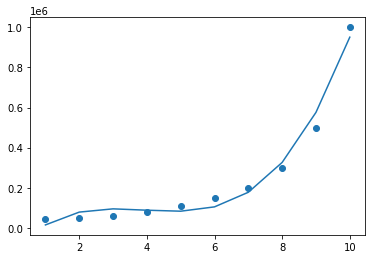

In [47]:
plt.scatter(x,y)
plt.plot(x,y_predict)

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
input_steps=[('polynomial',PolynomialFeatures(degree=3)),('model',LinearRegression())]

In [50]:
pipModel=Pipeline(input_steps)

In [51]:
pipModel.fit(x,y)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [54]:
y_pip_predict=pipModel.predict(x)

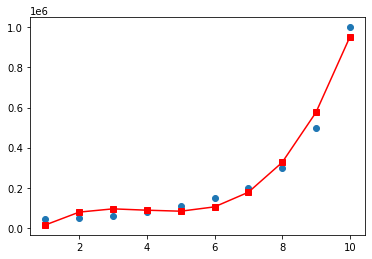

In [59]:
plt.scatter(x,y)
plt.plot(x,y_pip_predict,'r-s')